<a href="https://colab.research.google.com/github/ParthTiwari246/NeuralNetworks/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model
import matplotlib.pyplot as plt
plt.style.use('classic')
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
train_df = pd.read_csv('/content/training.csv')
test_df = pd.read_csv('/content/test.csv')
val_df = pd.read_csv('/content/validation.csv')

In [3]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


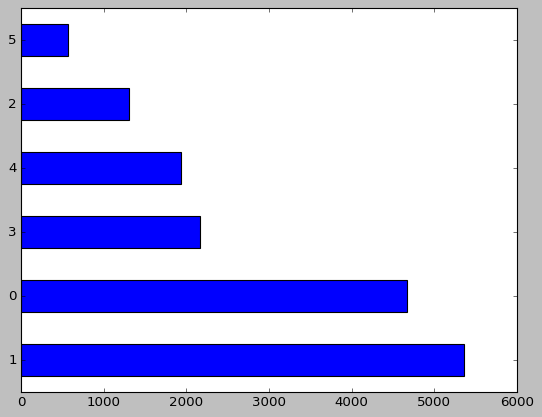

In [9]:
train_df['label'].value_counts().plot(kind='barh')

(array([2641., 3795., 3968., 2306., 1499.,  963.,  453.,  251.,  106.,
          18.]),
 array([ 2. ,  8.4, 14.8, 21.2, 27.6, 34. , 40.4, 46.8, 53.2, 59.6, 66. ]),
 <a list of 10 Patch objects>)

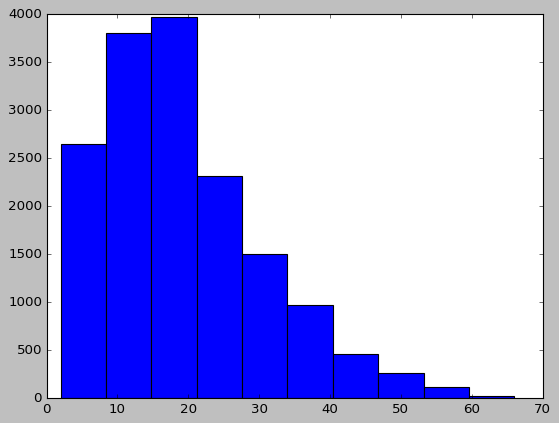

In [10]:
plt.hist([len(i.split()) for i in train_df['text']])

In [11]:
output = train_df.label.nunique()

In [12]:
text_vectorization = layers.TextVectorization(max_tokens=20_000,
                                              output_sequence_length=60)
text_vectorization.adapt(train_df['text'])

embedding = layers.Embedding(input_dim=20_000,
                             output_dim=128,
                             mask_zero=True)

In [13]:
text_inputs = layers.Input(shape=(1,), dtype=tf.string)

x = text_vectorization(text_inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(32, return_sequences=True)(x)
x = layers.Bidirectional(layers.LSTM(16, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(8, return_sequences=True))(x)
x = layers.GlobalAveragePooling1D()(x)

text_outputs = layers.Dense(output, activation='softmax')(x)

model = Model(text_inputs, text_outputs)

In [14]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

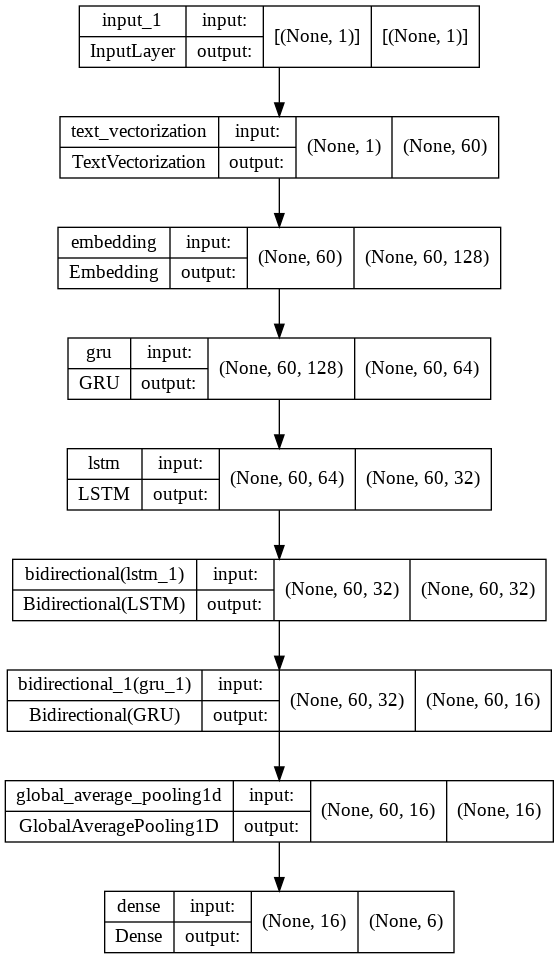

In [15]:
plot_model(model, show_shapes=True)

In [17]:
x = train_df['text'].tolist()
y = train_df['label'].tolist()

x_val = val_df['text'].tolist()
y_val = val_df['label'].tolist()

x_test = test_df['text'].tolist()
y_test = test_df['label'].tolist()

In [18]:
history = model.fit(x, y,
                    epochs=10,
                    validation_data=[x_val, y_val])

Epoch 1/10
500/500 [==============================] - 49s 57ms/step - loss: 0.7500 - accuracy: 0.7251 - val_loss: 0.4243 - val_accuracy: 0.8560
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 0.2783 - accuracy: 0.9065 - val_loss: 0.2528 - val_accuracy: 0.9160
Epoch 3/10
500/500 [==============================] - 22s 44ms/step - loss: 0.1839 - accuracy: 0.9311 - val_loss: 0.2887 - val_accuracy: 0.9080
Epoch 4/10
500/500 [==============================] - 21s 42ms/step - loss: 0.1502 - accuracy: 0.9380 - val_loss: 0.1967 - val_accuracy: 0.9280
Epoch 5/10
500/500 [==============================] - 25s 50ms/step - loss: 0.1199 - accuracy: 0.9514 - val_loss: 0.2107 - val_accuracy: 0.9280
Epoch 6/10
500/500 [==============================] - 21s 41ms/step - loss: 0.1219 - accuracy: 0.9525 - val_loss: 0.2181 - val_accuracy: 0.9125
Epoch 7/10
500/500 [==============================] - 19s 38ms/step - loss: 0.1190 - accuracy: 0.9511 - val_loss: 0.2549 - val_accuracy:

In [19]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 1s 13ms/step - loss: 0.2232 - accuracy: 0.9195


[0.22315721213817596, 0.9194999933242798]

In [21]:
y_preds = model.predict(x_test)
print('Initial Shape : ',y_preds.shape)
print('\n')
y_preds = tf.argmax(y_preds, axis=1)
print('Shape after argmax : ',y_preds.shape)
print('\n')

print('Sample Prediction : ',y_preds[:10])
test_df['Predicted Labels'] = y_preds

Initial Shape :  (2000, 6)


Shape after argmax :  (2000,)


Sample Prediction :  tf.Tensor([0 0 0 1 0 4 1 1 1 3], shape=(10,), dtype=int64)


In [22]:
test_df.head(10)

,text,label,Predicted Labels
0,im feeling rather rotten so im not very ambiti...,0,0
1,im updating my blog because i feel shitty,0,0
2,i never make her separate from me because i do...,0,0
3,i left with my bouquet of red and yellow tulip...,1,1
4,i was feeling a little vain when i did this one,0,0
5,i cant walk into a shop anywhere where i do no...,4,4
6,i felt anger when at the end of a telephone call,3,1
7,i explain why i clung to a relationship with a...,1,1
8,i like to have the same breathless feeling as ...,1,1
9,i jest i feel grumpy tired and pre menstrual w...,3,3


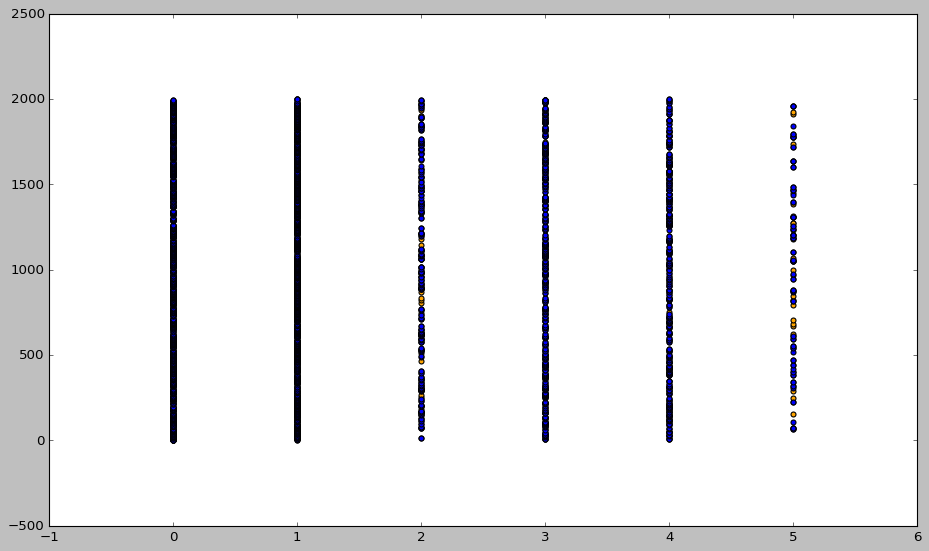

In [23]:
plt.figure(figsize=(14,8))
plt.scatter(test_df['label'], test_df.index, c='orange')
plt.scatter(test_df['Predicted Labels'], test_df.index, c='blue')
plt.show()